In [ ]:
# sqft_livingsquare
# sqft_lotsquare
# grade
# condition
# waterfront (drop null values)
# zipcode


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
housing_df.drop(['id'], axis=1, inplace=True)

In [5]:
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
housing_df_drop = housing_df[['price', 'sqft_living', 'sqft_lot', 'grade', 'condition', 'waterfront']]

In [7]:
housing_df_drop.head()

,price,sqft_living,sqft_lot,grade,condition,waterfront
0,221900.0,1180,5650,7,3,NaN
1,538000.0,2570,7242,7,3,0.0
2,180000.0,770,10000,6,3,0.0
3,604000.0,1960,5000,7,5,0.0
4,510000.0,1680,8080,8,3,0.0


In [8]:
housing_df_edited = housing_df_drop.dropna()


In [9]:
housing_df_edited.set_index('price')

,sqft_living,sqft_lot,grade,condition,waterfront
price,,,,,
538000.0,2570,7242,7,3,0.0
180000.0,770,10000,6,3,0.0
604000.0,1960,5000,7,5,0.0
510000.0,1680,8080,8,3,0.0
1230000.0,5420,101930,11,3,0.0
...,...,...,...,...,...
475000.0,1310,1294,8,3,0.0
360000.0,1530,1131,8,3,0.0
400000.0,2310,5813,8,3,0.0


In [10]:
housing_df_edited

,price,sqft_living,sqft_lot,grade,condition,waterfront
1,538000.0,2570,7242,7,3,0.0
2,180000.0,770,10000,6,3,0.0
3,604000.0,1960,5000,7,5,0.0
4,510000.0,1680,8080,8,3,0.0
5,1230000.0,5420,101930,11,3,0.0
...,...,...,...,...,...,...
21591,475000.0,1310,1294,8,3,0.0
21592,360000.0,1530,1131,8,3,0.0
21593,400000.0,2310,5813,8,3,0.0
21594,402101.0,1020,1350,7,3,0.0


In [11]:
cor = housing_df_edited.corr()
cor

,price,sqft_living,sqft_lot,grade,condition,waterfront
price,1.000000,0.704652,0.087005,0.667224,0.038037,0.276295
sqft_living,0.704652,1.000000,0.173345,0.764053,-0.057467,0.110230
sqft_lot,0.087005,0.173345,1.000000,0.114577,-0.014113,0.023143
grade,0.667224,0.764053,0.114577,1.000000,-0.144513,0.087383
condition,0.038037,-0.057467,-0.014113,-0.144513,1.000000,0.017642
waterfront,0.276295,0.110230,0.023143,0.087383,0.017642,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

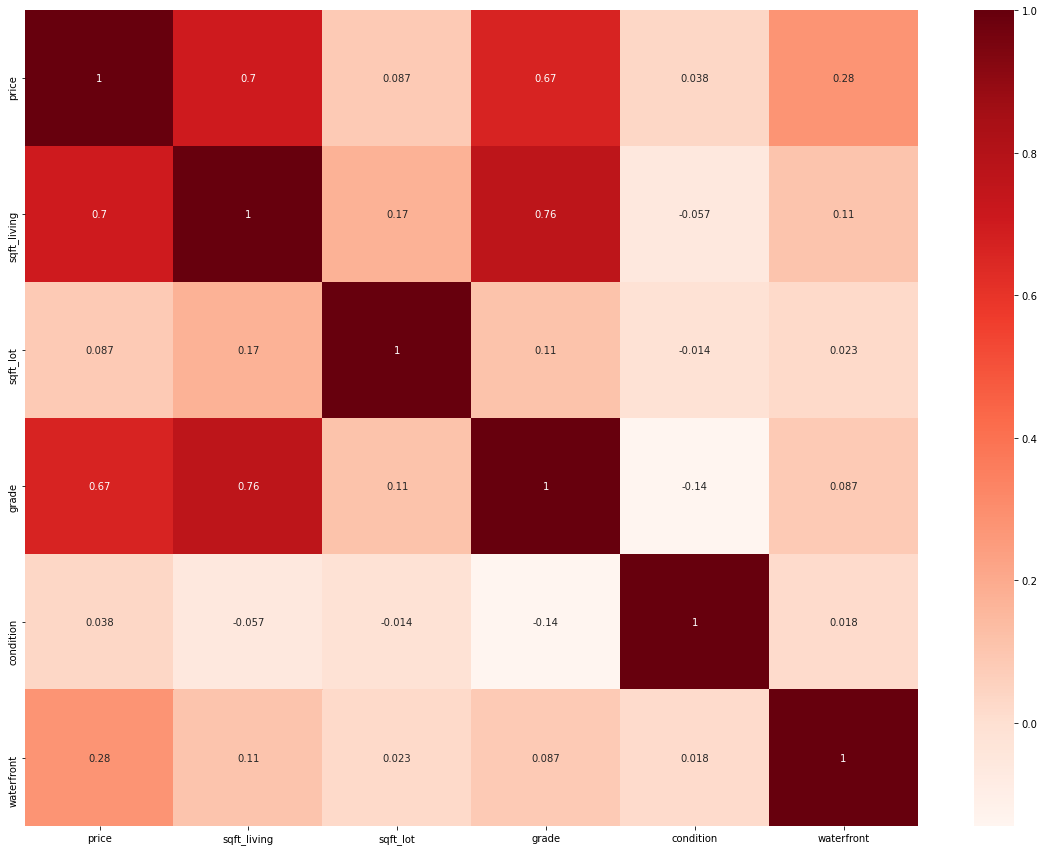

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show

In [40]:
housing_df_edited.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.704652
grade          0.667224
waterfront     0.276295
sqft_lot       0.087005
condition      0.038037
Name: price, dtype: float64

In [41]:
housing_df_edited.head()

,price,sqft_living,sqft_lot,grade,condition,waterfront
1,538000.0,2570,7242,7,3,0.0
2,180000.0,770,10000,6,3,0.0
3,604000.0,1960,5000,7,5,0.0
4,510000.0,1680,8080,8,3,0.0
5,1230000.0,5420,101930,11,3,0.0


In [42]:
housing_df_edited['grade'].value_counts()

7     7974
8     5409
9     2320
6     1810
10    1018
11     357
5      212
12      82
4       25
13      13
3        1
Name: grade, dtype: int64

In [43]:
housing_df_edited['condition'].value_counts()

3    12474
4     5058
5     1512
2      152
1       25
Name: condition, dtype: int64

In [44]:
housing_df_edited['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [45]:
housing_df_edited['price'].value_counts()

450000.0     153
350000.0     147
550000.0     144
500000.0     142
425000.0     135
            ... 
189900.0       1
643403.0       1
882990.0       1
688100.0       1
3570000.0      1
Name: price, Length: 3391, dtype: int64

In [46]:
housing_df_edited.head()

,price,sqft_living,sqft_lot,grade,condition,waterfront
1,538000.0,2570,7242,7,3,0.0
2,180000.0,770,10000,6,3,0.0
3,604000.0,1960,5000,7,5,0.0
4,510000.0,1680,8080,8,3,0.0
5,1230000.0,5420,101930,11,3,0.0
